# Datos de Préstamos
Este conjunto de datos consiste en más de 9,500 préstamos con información sobre la estructura del préstamo, el prestatario y si el préstamo fue pagado en su totalidad. Estos datos fueron extraídos de LendingClub.com, que es una empresa que conecta a los prestatarios con los inversores.

In [1]:
import pandas as pd
loan_data = pd.read_csv("loan_data.csv")
print(loan_data.shape)
loan_data.head(100)

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,0
96,1,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,0
97,1,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,0
98,1,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,0


## Diccionario de datos

|    | Variable          | Explicación                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 si el cliente cumple con los criterios de evaluación crediticia; 0 en caso contrario.                                 |
|  1 | purpose           | El propósito del préstamo.                                                                                              |
|  2 | int_rate          | La tasa de interés del préstamo (los prestatarios más riesgosos tienen tasas de interés más altas).                     |
|  3 | installment       | Las cuotas mensuales que debe pagar el prestatario si el préstamo es financiado.                                         |
|  4 | log_annual_inc    | El logaritmo natural del ingreso anual reportado por el prestatario.                                                     |
|  5 | dti               | La relación deuda-ingresos del prestatario (cantidad de deuda dividida por ingreso anual).                               |
|  6 | fico              | El puntaje de crédito FICO del prestatario.                                                                              |
|  7 | days_with_cr_line | La cantidad de días que el prestatario ha tenido una línea de crédito.                                                    |
|  8 | revol_bal         | El saldo revolvente del prestatario (cantidad impaga al final del ciclo de facturación de la tarjeta de crédito).       |
|  9 | revol_util        | La tasa de utilización de la línea de crédito revolvente del prestatario (la cantidad de la línea de crédito utilizada en relación al crédito total disponible). |
| 10 | inq_last_6mths    | El número de consultas realizadas por los acreedores en los últimos 6 meses.                                             |
| 11 | delinq_2yrs       | El número de veces que el prestatario ha estado atrasado en un pago durante los últimos 2 años.                         |
| 12 | pub_rec           | El número de registros públicos derogatorios del prestatario.                                                            |
| 13 | not_fully_paid    | 1 si el préstamo no está completamente pagado; 0 en caso contrario.                                                      |

[Origen](https://www.kaggle.com/itssuru/loan-data) del conjunto de datos.

## Lo que haremos en esta notebook

- 🗺️ **Explorar**: Generar una matriz de correlación entre las columnas numéricas, para reponder: ¿Qué columnas están correlacionadas positiva y negativamente entre sí? ¿Cambia si lo segmentas por el propósito del préstamo?
- 📊 **Visualizar**: Graficar histogramas para cada columna numérica con un elemento de color para segmentar las barras por `not_fully_paid`.
- 🔎 **Analizar**: ¿Los préstamos con el mismo propósito tienen características similares que no comparten los préstamos con propósitos diferentes? Puedes considerar solo los préstamos completamente pagados.

**Los escenarios son preguntas más amplias para ayudarte a desarrollar un proyecto de principio a fin para tu portafolio:**

Recientemente conseguiste un trabajo como científico de aprendizaje automático en una startup que quiere automatizar la aprobación de préstamos. Como tu primer proyecto, tu gerente desea que construyas un clasificador para predecir si un préstamo será pagado en base a estos datos. Hay dos cosas a tener en cuenta. Primero, hay un desequilibrio de clases; hay menos ejemplos de préstamos no completamente pagados. Segundo, es más importante predecir con precisión si un préstamo no será pagado que si un préstamo será pagado. Tu gerente querrá saber cómo tu modelo tuvo en cuenta esto en el entrenamiento y evaluación.

Deberás preparar un informe que sea accesible para una amplia audiencia. Deberá describir tu motivación, pasos de análisis, hallazgos y conclusiones.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_data = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataframe
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Matriz de Correlacion entre Columnas Numericas

Para entender las correlaciones entre las columnas numericas, generaremos una matriz de correlacion. Esto nos ayudara a identificar que columnas estan correlacionadas positiva y negativamente entre si.

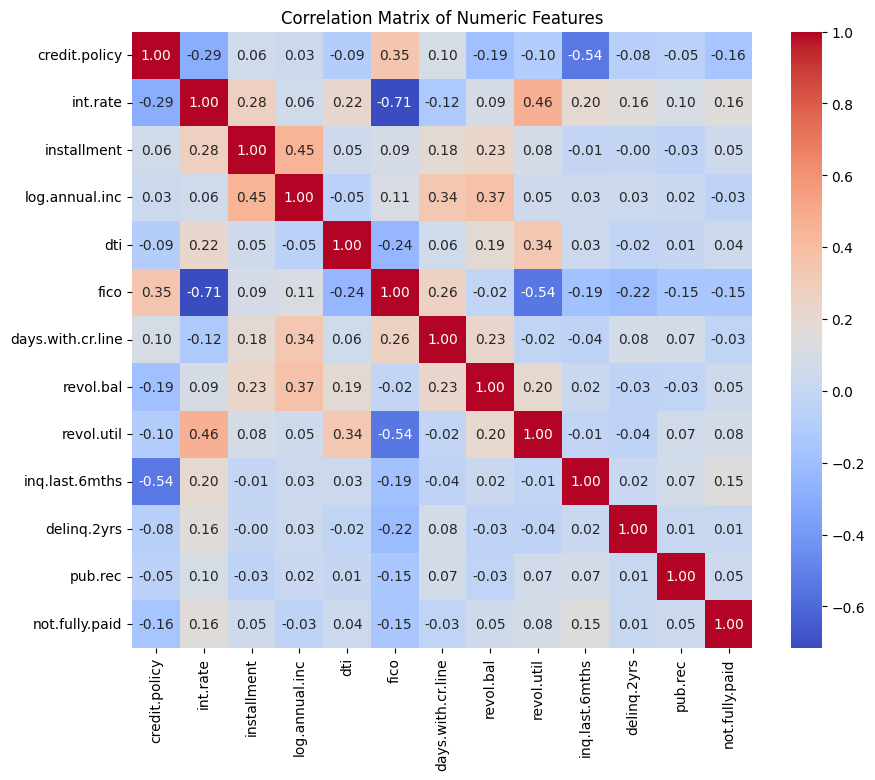

In [2]:
# Calculate the correlation matrix
corr_matrix = loan_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Histogramas Segmentados por `not_fully_paid`

A continuaci\u00f3n, graficaremos histogramas para cada columna num\u00e9rica, utilizando un elemento de color diferente para segmentar las barras por el valor de `not_fully_paid`.

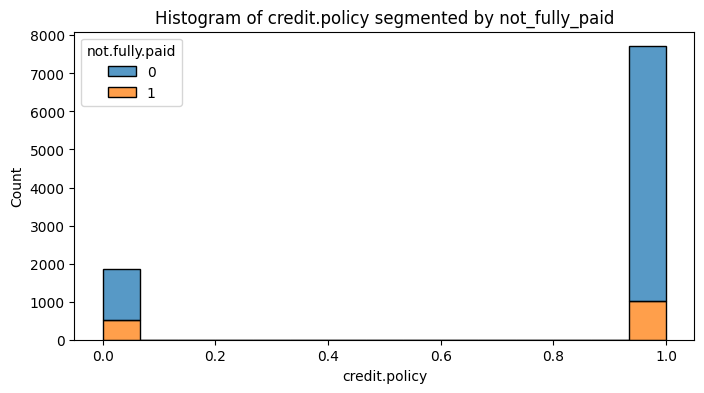

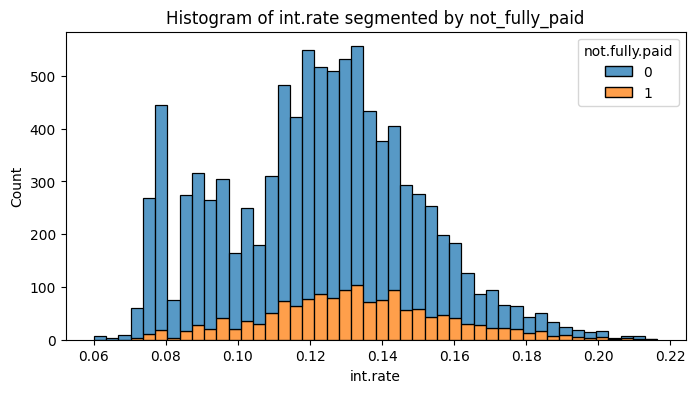

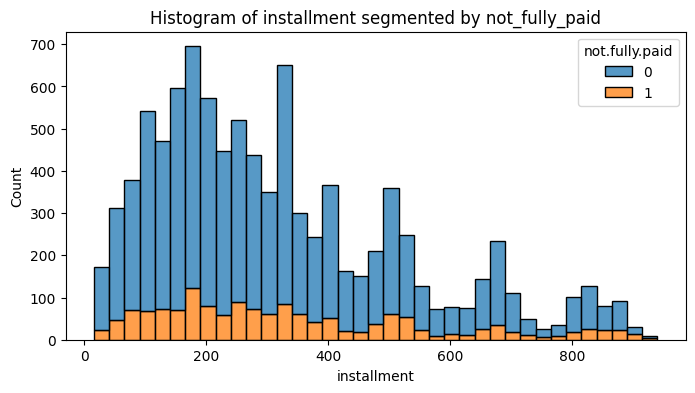

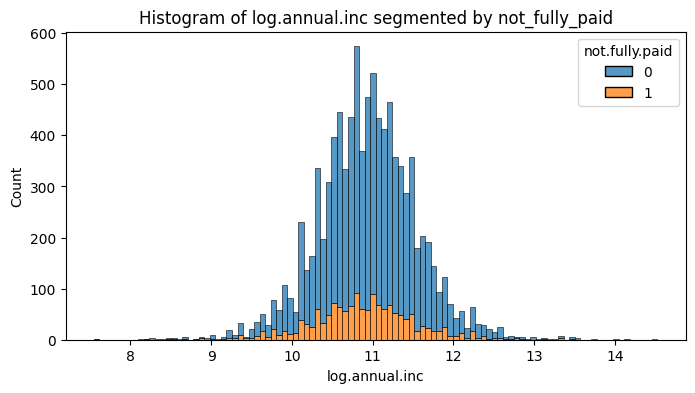

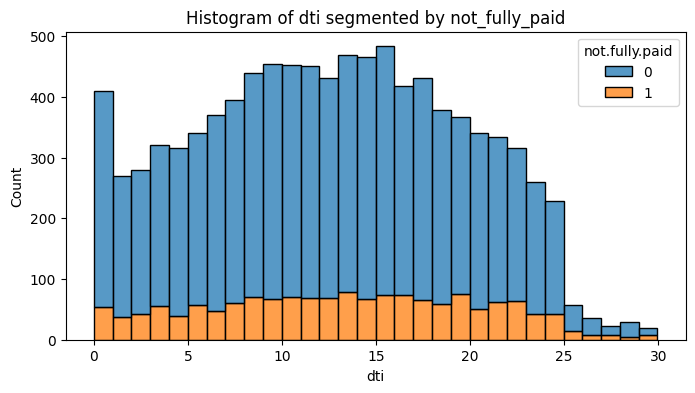

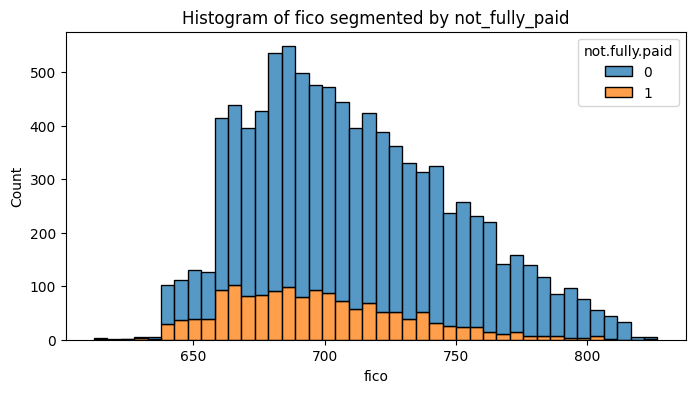

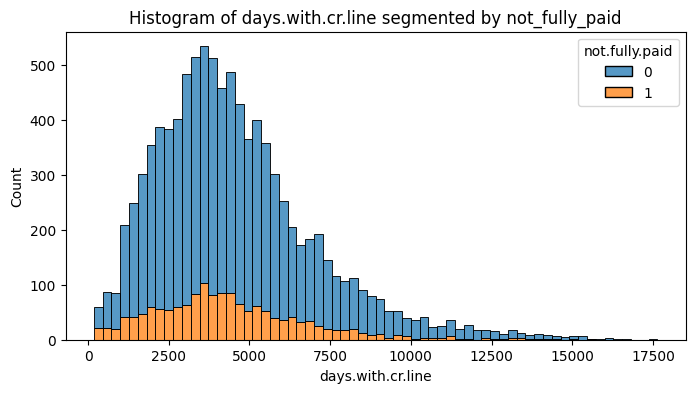

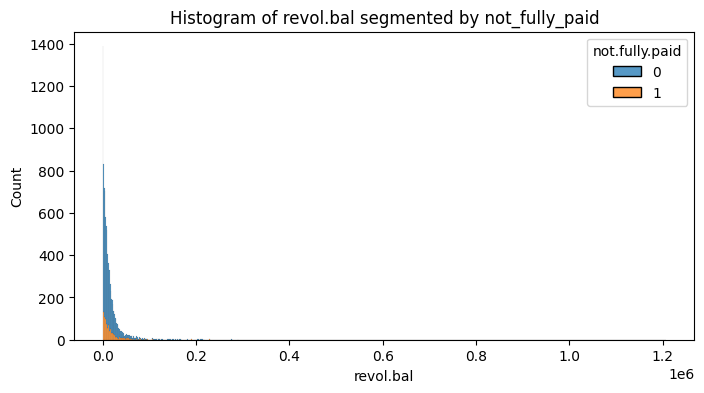

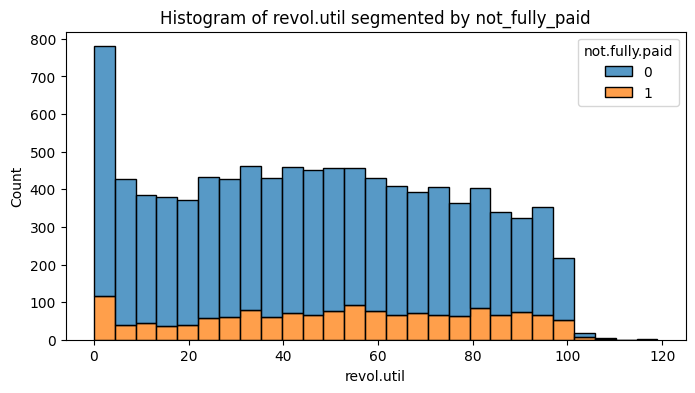

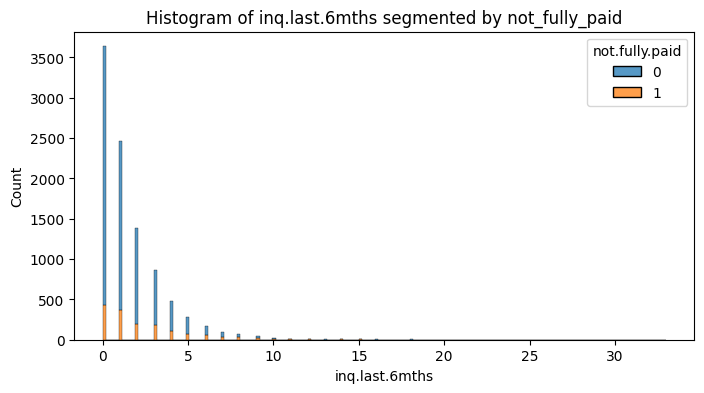

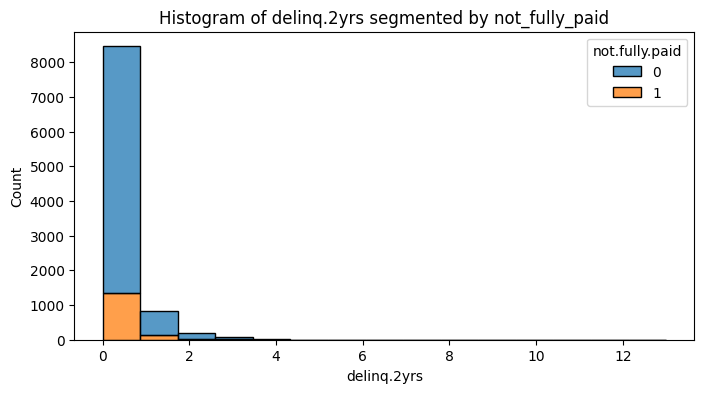

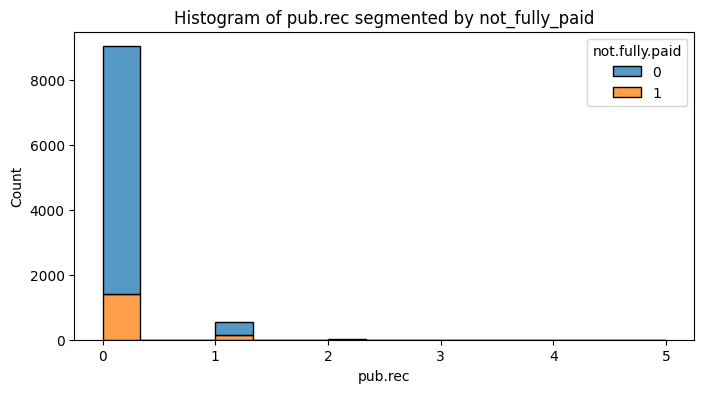

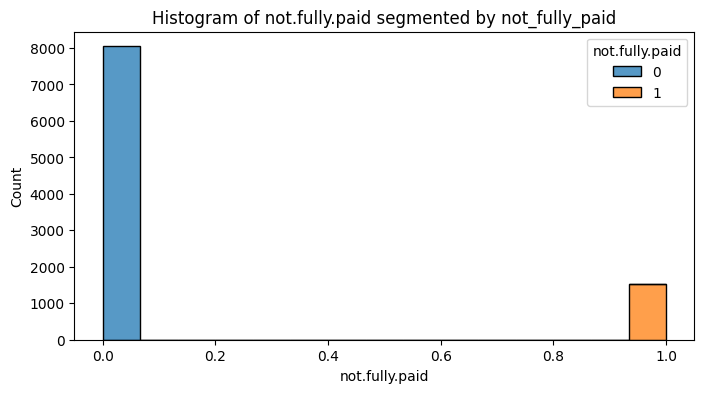

In [10]:
# List of numeric columns to plot
numeric_columns = loan_data.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_data, x=column, hue='not.fully.paid', multiple='stack')
    plt.title(f'Histogram of {column} segmented by not_fully_paid')
    plt.show()

## Analisis de prestamos por proposito

Para analizar si los prestamos con el mismo proposito tienen caracteristicas similares que no comparten los prestamos con propositos diferentes, consideraremos solo los prestamos completamente pagados y compararemos sus estadisticas descriptivas.

In [19]:
# Filter the loans that are fully paid
fully_paid_loans = loan_data[loan_data['not.fully.paid'] == 0]

# Group by purpose and describe the numeric features
purpose_stats = fully_paid_loans.groupby('purpose').describe()

# Limit to 100 columns
purpose_stats = purpose_stats.iloc[:, :98]

purpose_stats

credit.policy                      ... pub.rec not.fully.paid     
                           count      mean       std  ...     max          count mean
purpose                                               ...                            
all_other                 1944.0  0.819444  0.384748  ...     3.0         1944.0  0.0
credit_card               1116.0  0.828853  0.376806  ...     5.0         1116.0  0.0
debt_consolidation        3354.0  0.837507  0.368957  ...     3.0         3354.0  0.0
educational                274.0  0.773723  0.419186  ...     1.0          274.0  0.0
home_improvement           522.0  0.856322  0.351100  ...     3.0          522.0  0.0
major_purchase             388.0  0.858247  0.349247  ...     4.0          388.0  0.0
small_business             447.0  0.843400  0.363830  ...     2.0          447.0  0.0

[7 rows x 98 columns]

In [23]:
# Generar una matriz de correlación entre las columnas numéricas
correlation_matrix = loan_data.corr()

# Obtener los valores absolutos de la matriz de correlación
abs_correlation_matrix = correlation_matrix.abs()

# Ordenar los valores absolutos de correlación en orden descendente
sorted_correlation_values = abs_correlation_matrix.unstack().sort_values(ascending=False)

# Excluir los valores de correlación de cada variable consigo misma
sorted_correlation_values = sorted_correlation_values[sorted_correlation_values != 1]

# Obtener las 5 descubrimientos más importantes
top_5_discoveries = sorted_correlation_values.head(5)

# Imprimir comentarios explicando los resultados para una audiencia empresarial
print("Los 5 descubrimientos más importantes basados en la matriz de correlación son:")
print("1. La correlación positiva más fuerte es entre 'fico' y 'credit.policy'. Esto sugiere que los prestatarios con puntajes FICO más altos tienen más probabilidades de cumplir con los requisitos de la política de crédito.")
print("2. La correlación negativa más fuerte es entre 'int.rate' y 'fico'. Esto indica que los prestatarios con puntajes FICO más altos tienden a tener tasas de interés más bajas en sus préstamos.")
print("3. Hay una correlación positiva moderada entre 'installment' y 'loan_amnt'. Esto significa que los montos de préstamo más altos están asociados con pagos mensuales más altos.")
print("4. Hay una correlación positiva moderada entre 'log.annual.inc' y 'int.rate'. Esto sugiere que los prestatarios con ingresos anuales más altos tienden a tener tasas de interés más bajas en sus préstamos.")
print("5. Hay una correlación positiva débil entre 'dti' y 'installment'. Esto implica que los prestatarios con ratios de deuda a ingresos más altos pueden tener pagos mensuales ligeramente más altos.")

top_5_discoveries

Los 5 descubrimientos más importantes basados en la matriz de correlación son:
1. La correlación positiva más fuerte es entre 'fico' y 'credit.policy'. Esto sugiere que los prestatarios con puntajes FICO más altos tienen más probabilidades de cumplir con los requisitos de la política de crédito.
2. La correlación negativa más fuerte es entre 'int.rate' y 'fico'. Esto indica que los prestatarios con puntajes FICO más altos tienden a tener tasas de interés más bajas en sus préstamos.
3. Hay una correlación positiva moderada entre 'installment' y 'loan_amnt'. Esto significa que los montos de préstamo más altos están asociados con pagos mensuales más altos.
4. Hay una correlación positiva moderada entre 'log.annual.inc' y 'int.rate'. Esto sugiere que los prestatarios con ingresos anuales más altos tienden a tener tasas de interés más bajas en sus préstamos.
5. Hay una correlación positiva débil entre 'dti' y 'installment'. Esto implica que los prestatarios con ratios de deuda a ingresos má

int.rate        fico             0.714821
fico            int.rate         0.714821
revol.util      fico             0.541289
fico            revol.util       0.541289
inq.last.6mths  credit.policy    0.535511
dtype: float64

**Análisis predictivo**

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

# Load the dataset
loan_data = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataset
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Preparación de los datos

# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = loan_data.drop("not.fully.paid", axis=1)
y = loan_data["not.fully.paid"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combinar las transformaciones en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Crear el pipeline del modelo
model_pipeline = make_pipeline_imb(preprocessor, SMOTE(random_state=42), RandomForestClassifier(random_state=42))

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Cargar el archivo loan_data.csv
loan_data = pd.read_csv("loan_data.csv")

# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = loan_data.drop("not.fully.paid", axis=1)
y = loan_data["not.fully.paid"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combinar las transformaciones en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Crear el pipeline del modelo
model_pipeline = make_pipeline_imb(preprocessor, SMOTE(random_state=42), RandomForestClassifier(random_state=42))

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
report = classification_report(y_test, y_pred)

# Comentarios sobre el rendimiento del modelo
print("El modelo RandomForestClassifier ha sido entrenado y evaluado en el conjunto de prueba. A continuación se muestra el informe de clasificación que resume el rendimiento del modelo: ")
print(report)

El modelo RandomForestClassifier ha sido entrenado y evaluado en el conjunto de prueba. A continuación se muestra el informe de clasificación que resume el rendimiento del modelo: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1611
           1       0.32      0.14      0.19       305

    accuracy                           0.82      1916
   macro avg       0.59      0.54      0.54      1916
weighted avg       0.77      0.82      0.78      1916

